In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [120]:
g = 9.81
Hc = 4.5/100
times = [16, 28.8, 39.9]
height = np.array([7.7, 6.9, 6.5]) / 100
height_above = height - Hc
rate = 10 / np.array(times) * 0.001
width = 8 / 100
rate = rate / width
deeptheory = rate**(2/3) * g**(-1/3) * 3 / 2
# full theory:
theory = 0 * height
for i in range(3):
    dc = rate[i]**(2/3) * g**(-1/3)
    Bc = 0.5 * rate[i]**2 / dc**2 + g * dc + g * Hc
    roots = np.roots([1, -Bc/g, 0, 0.5 * rate[i]**2 / g])
    print(roots)
    theory[i] = roots[0] - Hc
    

[ 0.07198823  0.00688069 -0.0062804 ]
[ 0.0634055   0.00401263 -0.00377381]
[ 0.05986277  0.00296138 -0.00282179]


<IPython.core.display.Javascript object>


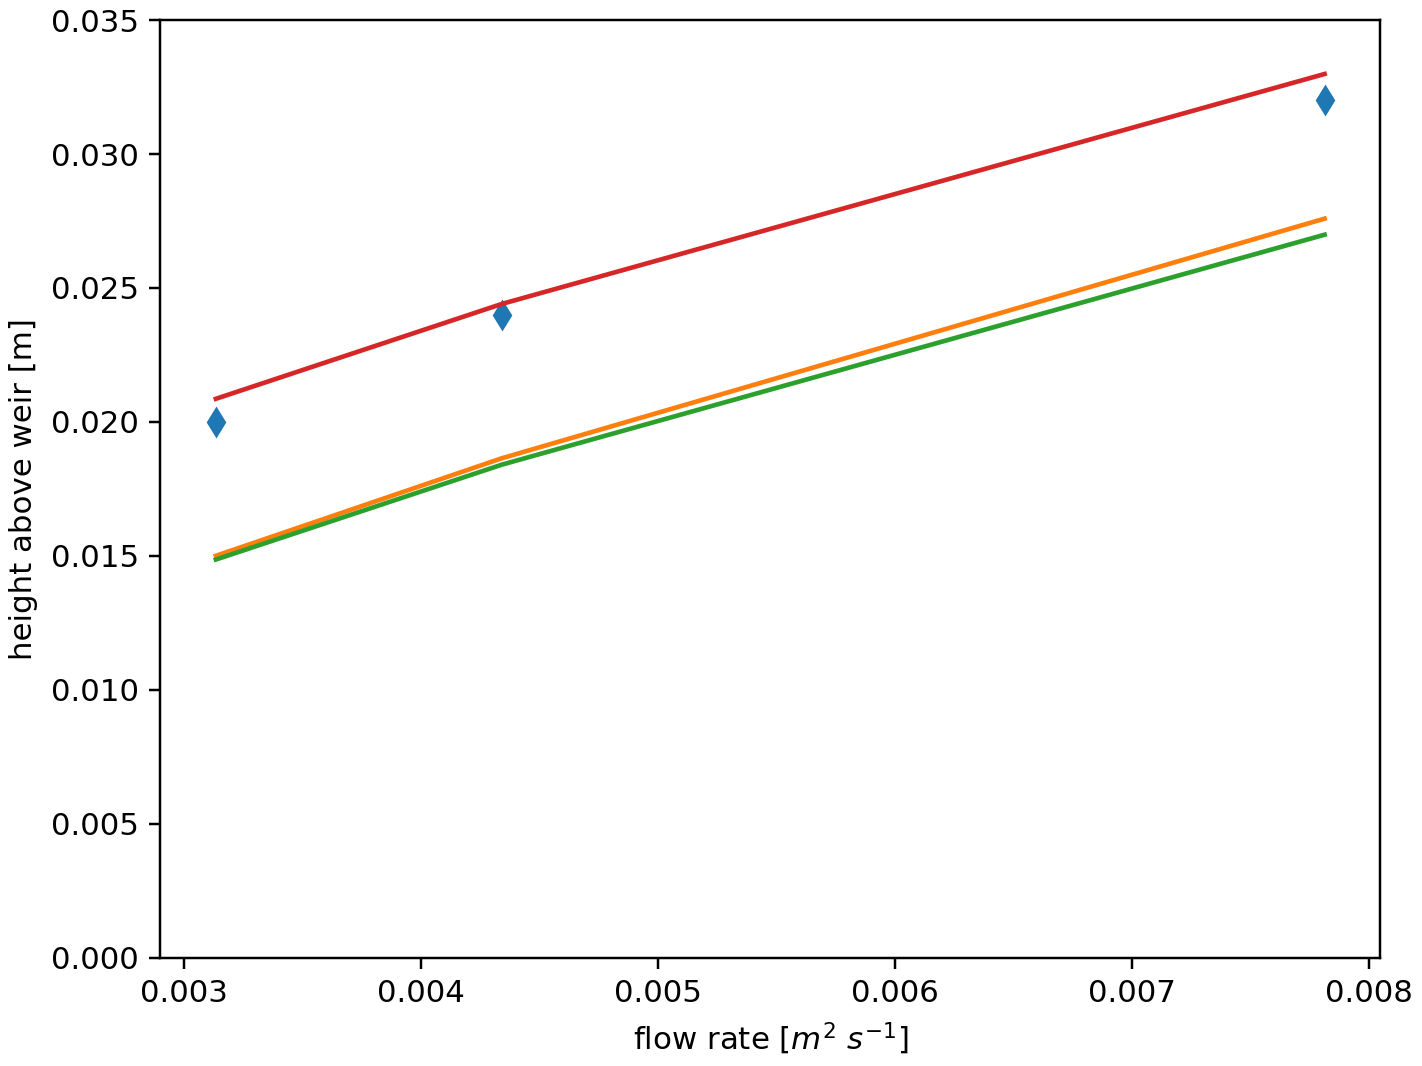

In [122]:
fig, ax = plt.subplots(constrained_layout=True)
ax.loglog(rate, height_above, 'd')
#ax.loglog(rate, (rate/rate[0])**(2/3)*height_above[0], 'd')

ax.loglog(rate, deeptheory)
ax.loglog(rate, theory)
ax.loglog(rate, theory+0.006)
ax.set_ylabel('height above weir [m]')
ax.set_xlabel('flow rate [$m^2\ s^{-1}$]')
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_ylim([0, 0.035])
fig.savefig('FlowRate.png')

In [123]:
g = 9.81
Hc = 4.5/100
times = [16, 28.8, 39.9]
height = np.array([7.7, 6.9, 6.5]) / 100
height_above = height - Hc
rate = 10 / np.array(times) * 0.001
width = 8 / 100
rate = rate / width
deeptheory = rate**(2/3) * g**(-1/3) * 3 / 2
# full theory:
x = np.arange(0, 20, 0.1)
H = Hc * np.exp(-(x-10)**2/16.)

theory = 0 * H
num = 0
dc = rate[num]**(2/3) * g**(-1/3)

for i in range(len(H)):
    Bc = 0.5 * rate[num]**2 / dc**2 + g * dc + g * Hc
    roots = np.roots([1, H[i]-Bc/g, 0, 0.5 * rate[num]**2 / g])
    print(roots)
    if x[i] < 10:
        theory[i] = roots[0]
    else:
        theory[i] = roots[1]
    

[ 0.07189988  0.0068855  -0.00628373]
[ 0.07188818  0.00688613 -0.00628417]
[ 0.07187507  0.00688685 -0.00628467]
[ 0.0718604   0.00688765 -0.00628522]
[ 0.07184401  0.00688854 -0.00628584]
[ 0.07182573  0.00688954 -0.00628653]
[ 0.07180535  0.00689065 -0.0062873 ]
[ 0.07178268  0.00689189 -0.00628816]
[ 0.07175748  0.00689326 -0.00628911]
[ 0.07172952  0.00689479 -0.00629017]
[ 0.07169853  0.00689648 -0.00629134]
[ 0.07166423  0.00689836 -0.00629264]
[ 0.07162633  0.00690044 -0.00629407]
[ 0.07158449  0.00690273 -0.00629566]
[ 0.07153838  0.00690526 -0.00629741]
[ 0.07148764  0.00690805 -0.00629933]
[ 0.07143186  0.00691112 -0.00630145]
[ 0.07137063  0.0069145  -0.00630378]
[ 0.07130353  0.0069182  -0.00630633]
[ 0.07123008  0.00692226 -0.00630913]
[ 0.07114979  0.00692671 -0.00631219]
[ 0.07106216  0.00693158 -0.00631554]
[ 0.07096665  0.00693689 -0.0063192 ]
[ 0.07086269  0.00694269 -0.00632318]
[ 0.07074969  0.00694901 -0.00632752]
[ 0.07062705  0.00695589 -0.00633224]
[ 0.07049413

/Users/jklymak/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


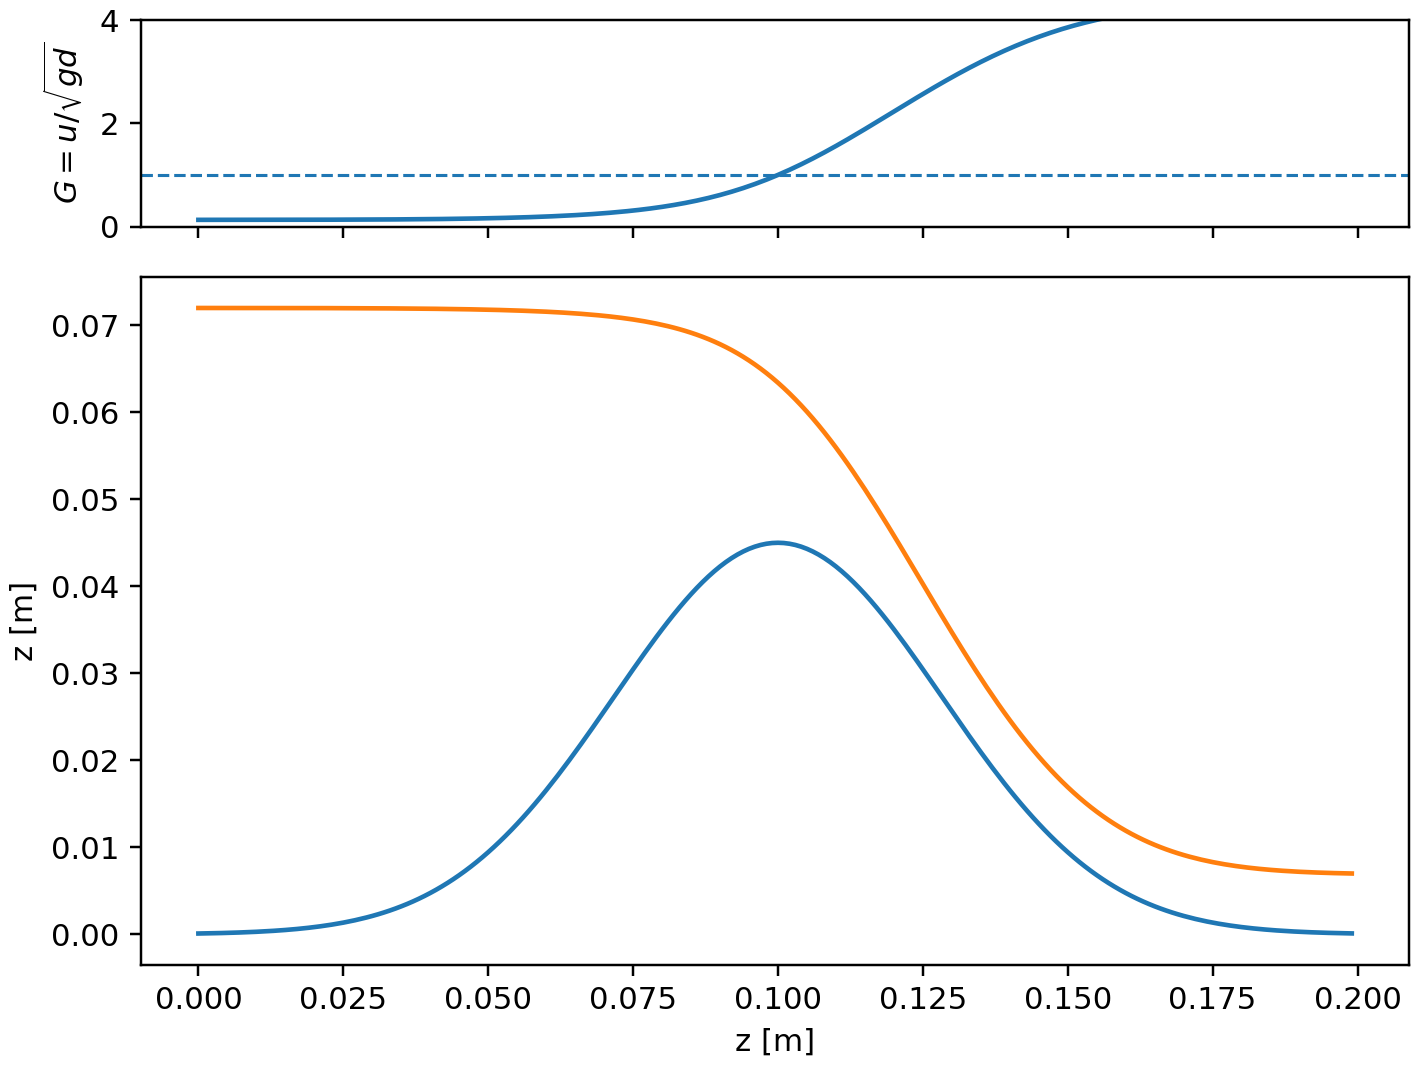

In [124]:
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.3, 1]}, sharex=True, constrained_layout=True)
u = rate[num]/theory
G = u**2 / g/ theory
ax[0].plot(x * 1e-2, np.sqrt(G))
ax[0].axhline(1, lw=1, ls='--')
ax[0].set_ylim(0,4)
ax[0].set_ylabel('$G = u / \sqrt{gd}$')
ax[1].plot(x* 1e-2, H)
ax[1].plot(x* 1e-2, theory+H)
ax[1].set_ylabel('z [m]')
ax[1].set_xlabel('z [m]')
fig.savefig('Response.png')

<IPython.core.display.Javascript object>


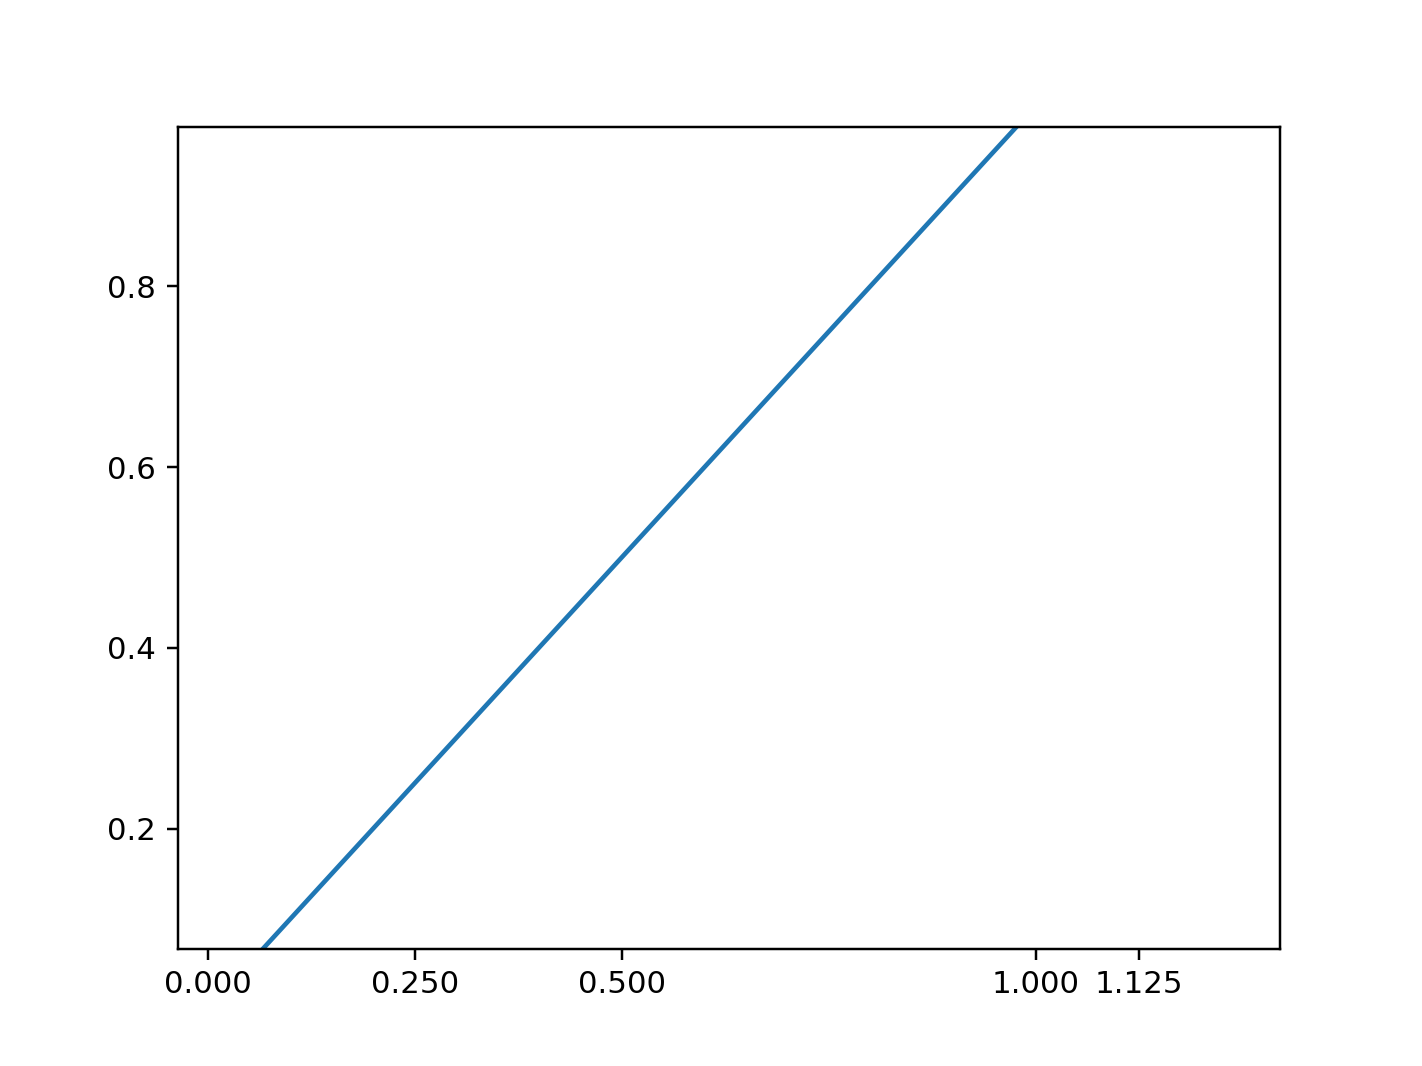

In [127]:
fig, ax = plt.subplots()
ax.plot(range(10))
ax.set_xticks([0, 0.25, 0.5, 1., 1.125])